In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('datasets/corrigido.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/corrigido.csv'

In [ ]:
df.info()

''' A coluna 'IDADE EM ANOS' nao representa a idade em ANOS do individuo. 
Checar a unidade sendo utilizada na coluna 'TIPO IDADE' '''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459086 entries, 0 to 1459085
Data columns (total 31 columns):
 #   Column                                                            Non-Null Count    Dtype  
---  ------                                                            --------------    -----  
 0   DATA DA NOTIFICACAO                                               1457881 non-null  object 
 1   DOR DE GARGANTA                                                   1374060 non-null  object 
 2   DISPNEIA                                                          1374057 non-null  object 
 3   FEBRE                                                             1374062 non-null  object 
 4   TOSSE                                                             1374063 non-null  object 
 5   OUTROS                                                            1374052 non-null  object 
 6   E PROFISSIONAL DE SAUDE?                                          1359545 non-null  object 
 7   DATA DO I

" A coluna 'IDADE EM ANOS' nao representa a idade em ANOS do individuo. \nChecar a unidade sendo utilizada na coluna 'TIPO IDADE' "

In [ ]:
# Serao utilizadas apenas as colunas consideradas relevantes para a continuacao do trabalho
df = df[[
    # Sintomas
    # 'DOR DE GARGANTA',
    # 'DISPNEIA',
    # 'FEBRE',
    # 'TOSSE',
    # 'OUTROS',
    
    # Agravantes
    # 'DOENCAS RESPIRATORIAS CRONICAS DESCOMPENSADAS',
    # 'DOENCAS CARDIACAS CRONICAS',
    # 'DIABETES',
    # 'DOENCAS RENAIS CRONICAS EM ESTAGIO AVANCADO (GRAUS 3, 4 OU 5)',
    # 'IMUNOSSUPRESSAO',
    # 'PORTADOR DE DOENCAS CROMOSSOMICAS OU ESTADO DE FRAGILIDADE IMUNO',
    # 'GESTANTE DE ALTO RISCO',
    
    # Informacoes pessoais (perfil do paciente)
    'IDADE EM ANOS',
    'TIPO IDADE',
    # 'SEXO',
    # 'RACA/COR',
    
    # Informacoes de residencia (para realizar o mapeamento dos casos)
    # 'ESTADO DE RESIDENCIA',
    # 'MUNICIPIO DE RESIDENCIA',
    # 'BAIRRO'
]]

# Ignorar individuos cuja idade nao foi divulgada
df.dropna(subset = ['IDADE EM ANOS'], inplace=True)
df['IDADE EM ANOS'] = df['IDADE EM ANOS'].astype(int)

In [ ]:
df.loc[ df['IDADE EM ANOS'] > 100 ]

,IDADE EM ANOS,TIPO IDADE
863,121,NaN
1049,102,ANO(S)
1228,102,ANO(S)
6460,137,ANO(S)
7045,102,ANOS
...,...,...
1456867,104,ANO(S)
1457005,101,ANO(S)
1457053,111,ANO(S)
1457502,104,ANO(S)


In [ ]:
df['TIPO IDADE'].unique()

array(['ANO(S)', 'ANOS', 'MES(ES)', nan, 'DIA(S)', 'MESES', 'DIAS', 'MES',
       'HORA(S)', 'ANO', 'DIA'], dtype=object)

<AxesSubplot:>

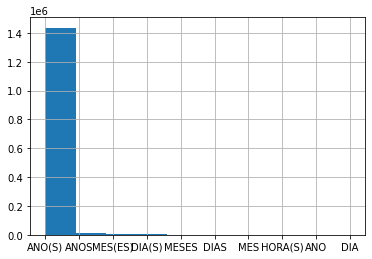

In [ ]:
df['TIPO IDADE'].hist()

In [ ]:
def tipo_idade_map(original):
    if not type(original) == float:
        if 'HORA' in original:
            return 'HORAS'
        if 'DIA' in original:
            return 'DIAS'
        if 'MES' in original:
            return 'MESES'
        if 'ANO' in original:
            return 'ANOS'
    return 'INDEFINIDO'

df['TIPO IDADE'] = [tipo_idade_map(i) for i in df['TIPO IDADE']]

In [ ]:
df['TIPO IDADE'].unique()

array(['ANOS', 'MESES', 'INDEFINIDO', 'DIAS', 'HORAS'], dtype=object)

In [ ]:
df['TIPO IDADE'].describe()

count     1458159
unique          5
top          ANOS
freq      1446636
Name: TIPO IDADE, dtype: object

<AxesSubplot:>

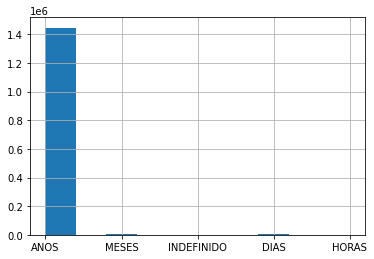

In [ ]:
df['TIPO IDADE'].hist()

In [ ]:
# Corrigindo a coluna 'IDADE EM ANOS' para realmente indicar a idade em anos dos individuos

meses_para_anos = lambda x : x/12
dias_para_anos = lambda x : meses_para_anos( x/30 )
horas_para_anos = lambda x : dias_para_anos( x/24 )

def calc_idade(valor, tipo):
    if tipo == 'MESES':
        return meses_para_anos(valor)
    if tipo == 'DIAS':
        return dias_para_anos(valor)
    if tipo == 'HORAS':
        return horas_para_anos(valor)
    return valor

df['IDADE EM ANOS'] = [ int( calc_idade(x[0],x[1]) ) for x in df[['IDADE EM ANOS','TIPO IDADE']].to_numpy() ]

<AxesSubplot:>

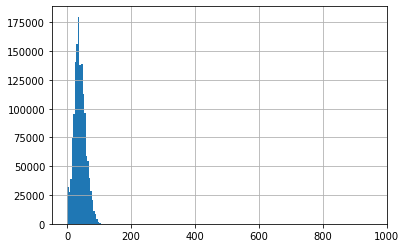

In [ ]:
df['IDADE EM ANOS'].hist(bins=200)

<AxesSubplot:>

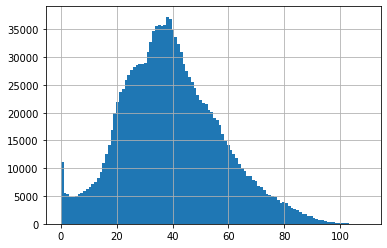

In [ ]:
df.loc[ df['IDADE EM ANOS'] < 110 ]['IDADE EM ANOS'].hist(bins=110)

<AxesSubplot:xlabel='TESTE'>

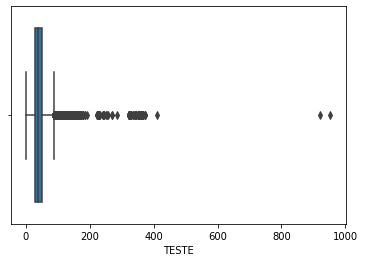

In [ ]:
sns.boxplot(x=df['IDADE EM ANOS'])